# Importing

In [67]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from os import path, listdir

# Preparing Data

In [68]:
PATH = 'dataset/'

train_dir = path.join(PATH, 'train')
test_dir  = path.join(PATH, 'test')

train_hotdog_dir     = path.join(train_dir, 'hot_dog')
train_not_hotdog_dir = path.join(train_dir, 'not_hot_dog')
test_hotdog_dir      = path.join(test_dir, 'hot_dog')
test_not_hotdog_dir  = path.join(test_dir, 'not_hot_dog')

In [84]:
epochs = 20

In [70]:
batch_size = 64

In [71]:
IMG_DIM = (256, 256)

In [72]:
image_data_generator_parameters = {
    'rescale': 1/255, 'horizontal_flip': True,
    'vertical_flip': True, 'rotation_range': 30
}
train_image_generator = ImageDataGenerator(**image_data_generator_parameters)
test_image_generator  = ImageDataGenerator(**image_data_generator_parameters)

In [73]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode='rgb',
                                                           target_size=IMG_DIM,
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=train_dir,
                                                         class_mode='binary')

Found 498 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


## Plot Some Images

In [76]:
def plot_images(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

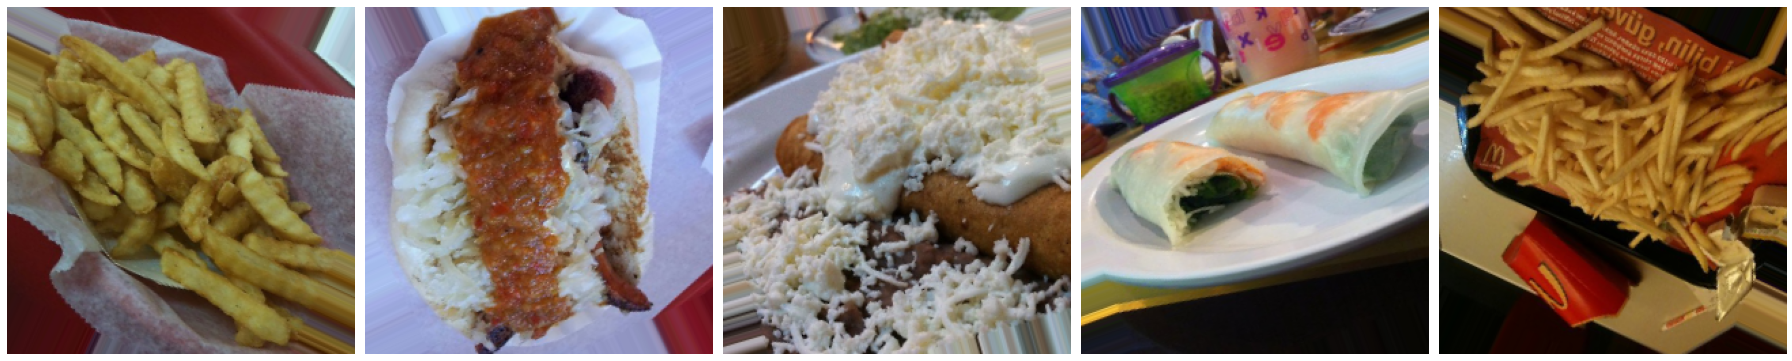

In [77]:
sample_training_images, _ = next(train_data_gen)

plot_images(sample_training_images[:5])

# TensorFlow Keras Model

## Creation

In [78]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(*IMG_DIM, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.05),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [79]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16777280  
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

## Training

In [81]:
total_train_size = len(listdir(train_hotdog_dir)) + len(listdir(train_not_hotdog_dir))
total_test_size = len(listdir(test_hotdog_dir)) + len(listdir(test_not_hotdog_dir))
total_data_size = total_train_size + total_test_size

In [85]:
history = model.fit(train_data_gen,
                    epochs=epochs,
                    steps_per_epoch=total_train_size // batch_size,
                    validation_data=test_data_gen,
                    validation_steps=total_test_size // batch_size)

Epoch 1/20
7/7 [==============================] - 51s 7s/step - loss: 0.5099 - accuracy: 0.7581 - val_loss: 0.4818 - val_accuracy: 0.7790
Epoch 2/20
7/7 [==============================] - 50s 7s/step - loss: 0.4794 - accuracy: 0.7742 - val_loss: 0.4539 - val_accuracy: 0.7612
Epoch 3/20
7/7 [==============================] - 50s 7s/step - loss: 0.4313 - accuracy: 0.7880 - val_loss: 0.4090 - val_accuracy: 0.8192
Epoch 4/20
7/7 [==============================] - 50s 7s/step - loss: 0.4240 - accuracy: 0.8065 - val_loss: 0.3923 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 50s 7s/step - loss: 0.3935 - accuracy: 0.8134 - val_loss: 0.3501 - val_accuracy: 0.8348
Epoch 6/20
7/7 [==============================] - 50s 8s/step - loss: 0.4145 - accuracy: 0.8041 - val_loss: 0.3622 - val_accuracy: 0.8504
Epoch 7/20
7/7 [==============================] - 51s 7s/step - loss: 0.3899 - accuracy: 0.8295 - val_loss: 0.3342 - val_accuracy: 0.8571
Epoch 8/20
7/7 [==================

## Validation

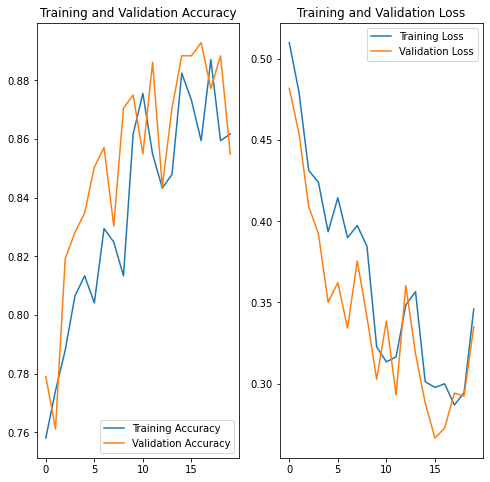

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff6c0f78-d6c5-4177-a01a-d4cbac19ef24' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>